### CIS 4360 Calculating Beta of a stock

### Instructor: Alex Pang


In [4]:
import datetime
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
import yfinance as yf

In [213]:
symbol = 'AAPL'
#symbol = 'MSFT'

start_date = '2021-10-01'
end_date = '2024-10-01'
stock = yf.Ticker(symbol).history(start=start_date, end=end_date)
stock['prevClose'] = stock['Close'].shift(1)
stock['Return'] = 100 * (stock['Close'] - stock['prevClose'])/stock['Close'] 
stock.dropna(inplace=True)
stock

,Open,High,Low,Close,Volume,Dividends,Stock Splits,prevClose,Return
Date,,,,,,,,,
2021-10-04 00:00:00-04:00,139.425248,139.867849,135.992737,136.848404,98322000,0.0,0.0,140.300598,-2.522641
2021-10-05 00:00:00-04:00,137.192651,139.897359,137.064787,138.785965,80861100,0.0,0.0,136.848404,1.396079
2021-10-06 00:00:00-04:00,137.172970,139.808824,136.091081,139.661301,83221100,0.0,0.0,138.785965,0.626756
2021-10-07 00:00:00-04:00,140.703861,141.844760,140.369464,140.930069,61732700,0.0,0.0,139.661301,0.900282
2021-10-08 00:00:00-04:00,141.657888,141.805411,140.212097,140.546494,58773200,0.0,0.0,140.930069,-0.272917
...,...,...,...,...,...,...,...,...,...
2024-09-24 00:00:00-04:00,228.649994,229.350006,225.729996,227.369995,43556100,0.0,0.0,226.470001,0.395828
2024-09-25 00:00:00-04:00,224.929993,227.289993,224.020004,226.369995,42308700,0.0,0.0,227.369995,-0.441755
2024-09-26 00:00:00-04:00,227.300003,228.500000,225.410004,227.520004,36636700,0.0,0.0,226.369995,0.505454


In [214]:
spy = yf.Ticker('SPY').history(start=start_date, end=end_date)
spy['prevClose'] = spy['Close'].shift(1)
spy['Return'] = 100 * (spy['Close'] - spy['prevClose'])/spy['Close'] 
spy.dropna(inplace=True)
spy

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,prevClose,Return
Date,,,,,,,,,,
2021-10-04 00:00:00-04:00,414.331955,415.250558,407.978213,410.159943,128570000,0.0,0.0,0.0,415.518555,-1.306469
2021-10-05 00:00:00-04:00,411.690962,416.714618,410.877632,414.427673,90682500,0.0,0.0,0.0,410.159943,1.029789
2021-10-06 00:00:00-04:00,410.762687,416.360480,409.107292,416.149963,113032200,0.0,0.0,0.0,414.427673,0.413863
2021-10-07 00:00:00-04:00,419.489576,422.637712,419.307765,419.747925,72437500,0.0,0.0,0.0,416.149963,0.857172
2021-10-08 00:00:00-04:00,420.532603,420.924930,418.341324,418.982422,74557400,0.0,0.0,0.0,419.747925,-0.182705
...,...,...,...,...,...,...,...,...,...,...
2024-09-24 00:00:00-04:00,570.479980,571.359985,567.599976,571.299988,46805700,0.0,0.0,0.0,569.669983,0.285315
2024-09-25 00:00:00-04:00,571.140015,571.890015,568.909973,570.039978,38428600,0.0,0.0,0.0,571.299988,-0.221039
2024-09-26 00:00:00-04:00,574.380005,574.710022,569.900024,572.299988,48336000,0.0,0.0,0.0,570.039978,0.394899


In [215]:
df = pd.DataFrame(index = stock.index)
df['Stock Return'] = stock['Return']
df['SPY Return'] = spy['Return']
df.head()

,Stock Return,SPY Return
Date,,
2021-10-04 00:00:00-04:00,-2.522641,-1.306469
2021-10-05 00:00:00-04:00,1.396079,1.029789
2021-10-06 00:00:00-04:00,0.626756,0.413863
2021-10-07 00:00:00-04:00,0.900282,0.857172
2021-10-08 00:00:00-04:00,-0.272917,-0.182705


***Calculate Beta using Covariance formula***

In [216]:
df.cov()

,Stock Return,SPY Return
Stock Return,2.994657,1.506039
SPY Return,1.506039,1.230953


In [217]:
beta = df.cov().iloc[0,0] / df.cov().iloc[0,1]
print(f'Beta for {symbol} ', beta)

Beta for AAPL  1.98843322387055


***Calculate Beta using regression on returns***

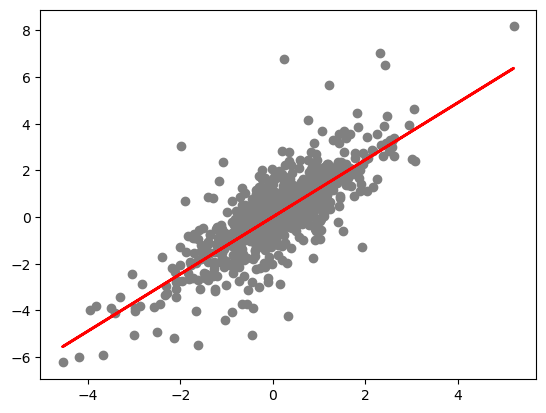

In [218]:
from sklearn.linear_model import LinearRegression

X = spy['Return'].values.reshape(-1, 1)
Y = stock['Return'].values.reshape(-1, 1)

model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)

plt.scatter(X, Y,  color='gray')
plt.plot(X, Y_pred, color='red', linewidth=2)
plt.show()


In [219]:
print(model.intercept_)
print(model.coef_)
print(f"Beta for {symbol}: ", model.coef_)

[0.00748325]
[[1.22347372]]
Beta for AAPL:  [[1.22347372]]
